In [18]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

In [19]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

In [20]:
df = pd.read_csv('formatted_df_Train_F10.csv')

In [21]:
class Data(Dataset):
    def __init__(self,path):
        df = pd.read_csv(path)
        x = df.iloc[:,24:26].values
        y = df.iloc[:,26:28].values
        self.len = df.shape[0]

        self.x_train = torch.tensor(x,dtype=torch.float32)
        self.y_train = torch.tensor(y,dtype=torch.float32)

    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]

    def __len__(self):
        return self.len

In [22]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2,20)
        self.l2 = nn.Linear(20,30)
        self.l3 = nn.Linear(30,2)
    def forward(self,x):
        y_pred = F.relu(self.l1(x))
        y_pred = F.relu(self.l2(y_pred))
        y_pred = self.l3(y_pred)

        return  y_pred

In [23]:
model = Model()
model.to(device)
dataset = Data('formatted_df_Train_F10.csv')
train_loader = DataLoader(dataset=dataset,batch_size=300,shuffle=True)

In [24]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.000000001)
criterion = nn.MSELoss()

In [25]:
epochs = 1000
for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        y_result = model(x)
        loss = criterion(y_result, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch = {epoch}, loss = {loss}")
print("Done training!")

epoch = 0, loss = 495869.0625
epoch = 1, loss = 493197.875
epoch = 2, loss = 451775.625
epoch = 3, loss = 316161.15625
epoch = 4, loss = 223774.9375
epoch = 5, loss = 130820.8984375
epoch = 6, loss = 88942.34375
epoch = 7, loss = 56918.796875
epoch = 8, loss = 32845.75390625
epoch = 9, loss = 25053.39453125
epoch = 10, loss = 20449.64453125
epoch = 11, loss = 19763.60546875
epoch = 12, loss = 26310.908203125
epoch = 13, loss = 21601.712890625
epoch = 14, loss = 19611.02734375
epoch = 15, loss = 25379.193359375
epoch = 16, loss = 22499.482421875
epoch = 17, loss = 15865.1435546875
epoch = 18, loss = 14423.6826171875
epoch = 19, loss = 17176.0078125
epoch = 20, loss = 13143.8466796875
epoch = 21, loss = 14700.244140625
epoch = 22, loss = 14839.49609375
epoch = 23, loss = 14364.62109375
epoch = 24, loss = 15771.8466796875
epoch = 25, loss = 12160.16796875
epoch = 26, loss = 14386.0478515625
epoch = 27, loss = 10893.7568359375
epoch = 28, loss = 19371.5390625
epoch = 29, loss = 21162.25781

In [29]:
df2 = pd.read_csv('formatted_df_Test_F10.csv')

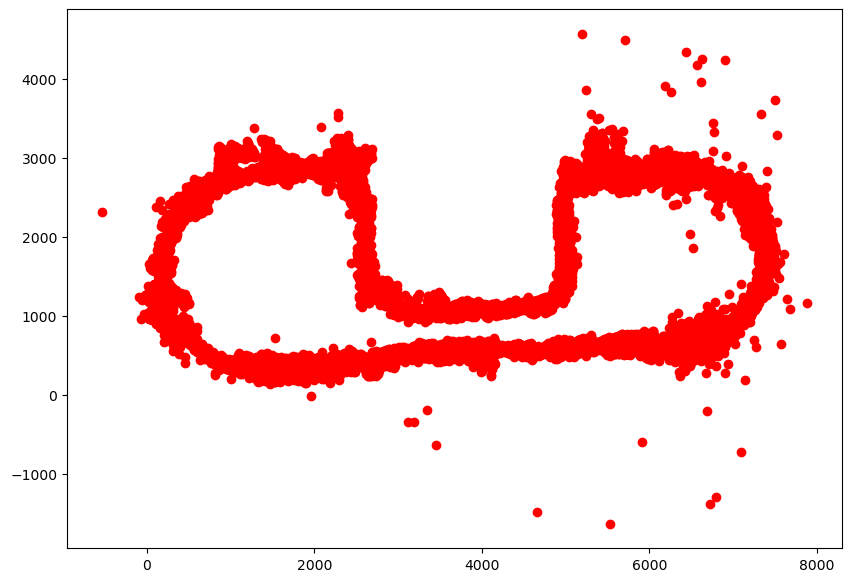

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(x=df2.data__coordinates__x,y=df2.data__coordinates__y,c='r')

In [35]:
test_F10 = df2.iloc[:,24:26].values
test_F10 = torch.tensor(test_F10,dtype=torch.float32,device=device)


In [36]:
pred = model(test_F10)

In [38]:
pred2 = torch.transpose(pred,0,1)

In [41]:
pred2.size()
out = pred2.cpu().data.numpy()
out

array([[3942.52   , 3922.6584 , 3905.4414 , ..., 3965.824  , 3969.1426 ,
        3995.5413 ],
       [ 450.13385,  427.9721 ,  446.19275, ...,  175.69514,  260.88556,
         201.21541]], dtype=float32)

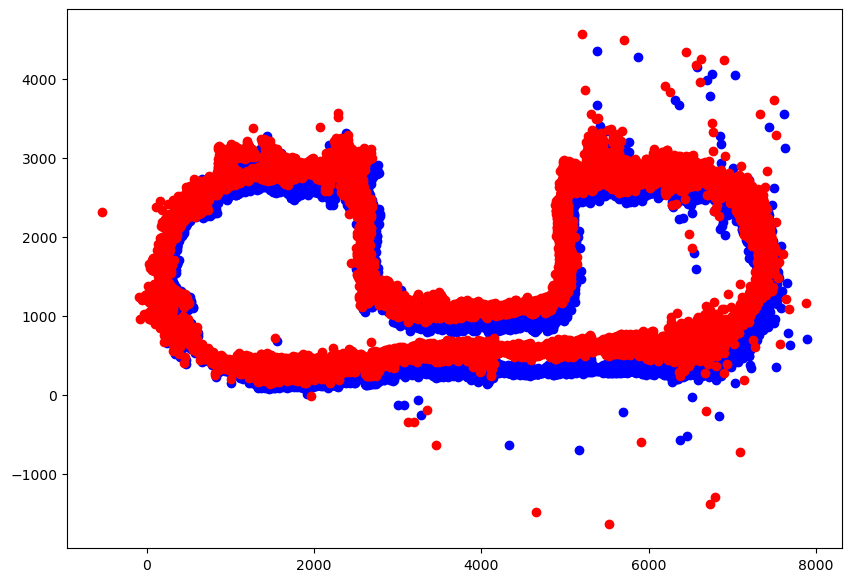

In [43]:
plt.figure(figsize=(10, 7))
plt.scatter(x=out[0],y=out[1],c='b')
plt.scatter(x=df2.data__coordinates__x,y=df2.data__coordinates__y,c='r')